### import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from mod_my_utils.read_write_data import *
from mod_macd_utils.macd import get_macd_signal_line
from mod_macd_utils.macd import get_signal_macd_crossover

### Read data

In [3]:
folder_path = 'data/'
stock_name = 'AAPL'
index_col = 'Date'

In [4]:
stock_data = get_price_csv(folder_name=folder_path,symbol=stock_name, index_col=index_col)

stock name:  AAPL


### Get Relevant data for model development

In [5]:
data = stock_data[["Adj. Close"]].copy()
data.columns = ["price"]
data.head()

,price
Date,
2007-12-03,22.986003
2007-12-04,23.108091
2007-12-05,23.839335
2007-12-06,24.411582
2007-12-07,24.970258


### Get Parameter

In [6]:
short_window = 50
long_window = 200
signal_window = 20


### MACD Signals

In [7]:
macd_signal_line = get_macd_signal_line(data, short_window, long_window, signal_window)
signals = get_signal_macd_crossover(macd_signal_line, long_window)

<AxesSubplot:xlabel='Date'>

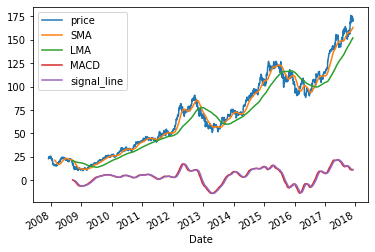

In [8]:
macd_signal_line.plot()

<AxesSubplot:xlabel='Date'>

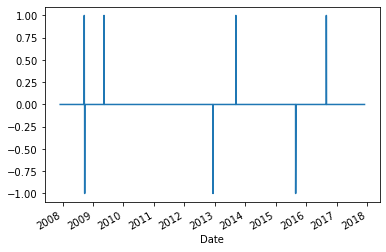

In [9]:
signals['buy_sell'].plot()

### Plot

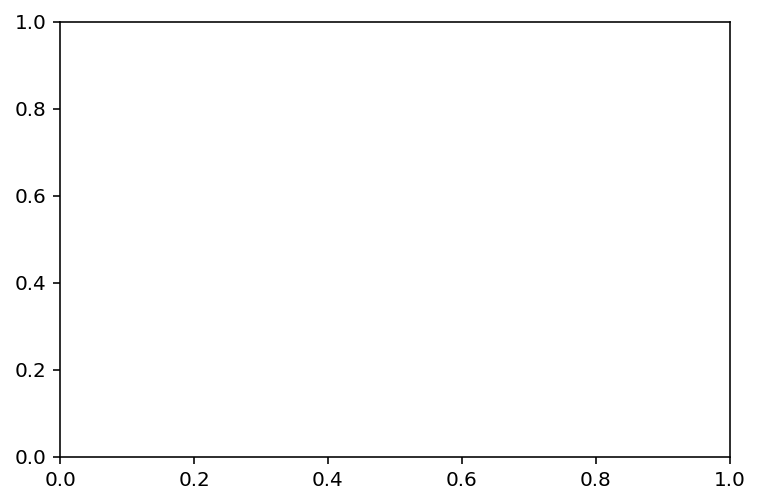

In [22]:
fig = plt.figure()
fig.add_subplot(111)
plt.show()

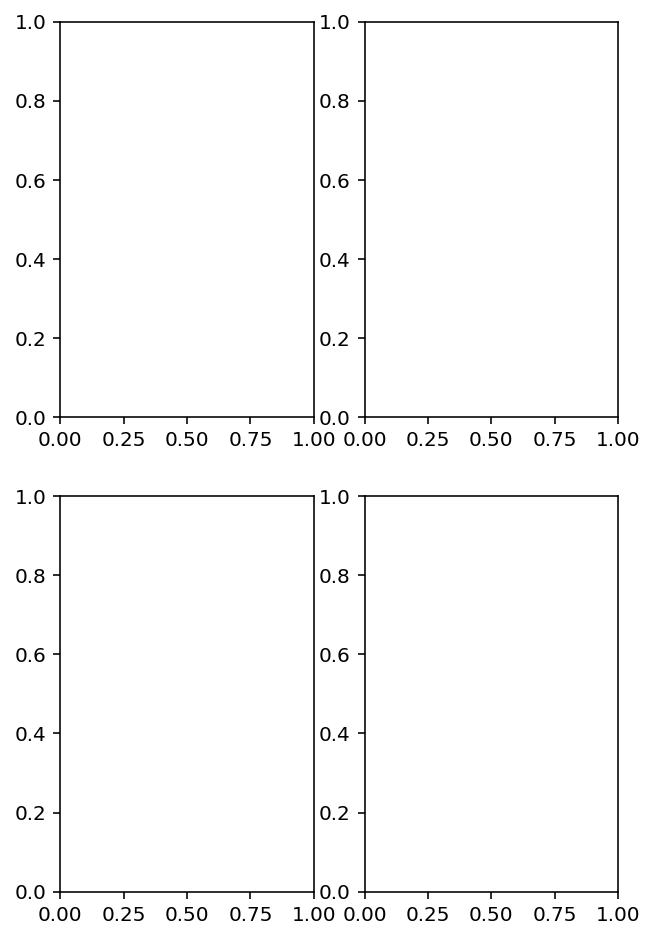

In [32]:
fig = plt.figure(figsize=(5,8))
fig.add_subplot(221)
fig.add_subplot(222)
fig.add_subplot(223)
fig.add_subplot(224)
plt.show()

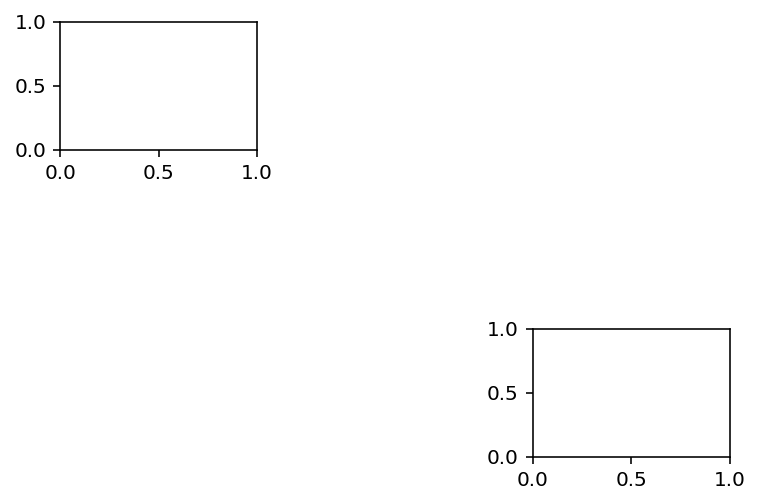

In [29]:
fig = plt.figure()
fig.add_subplot(331)
fig.add_subplot(339)
plt.show()

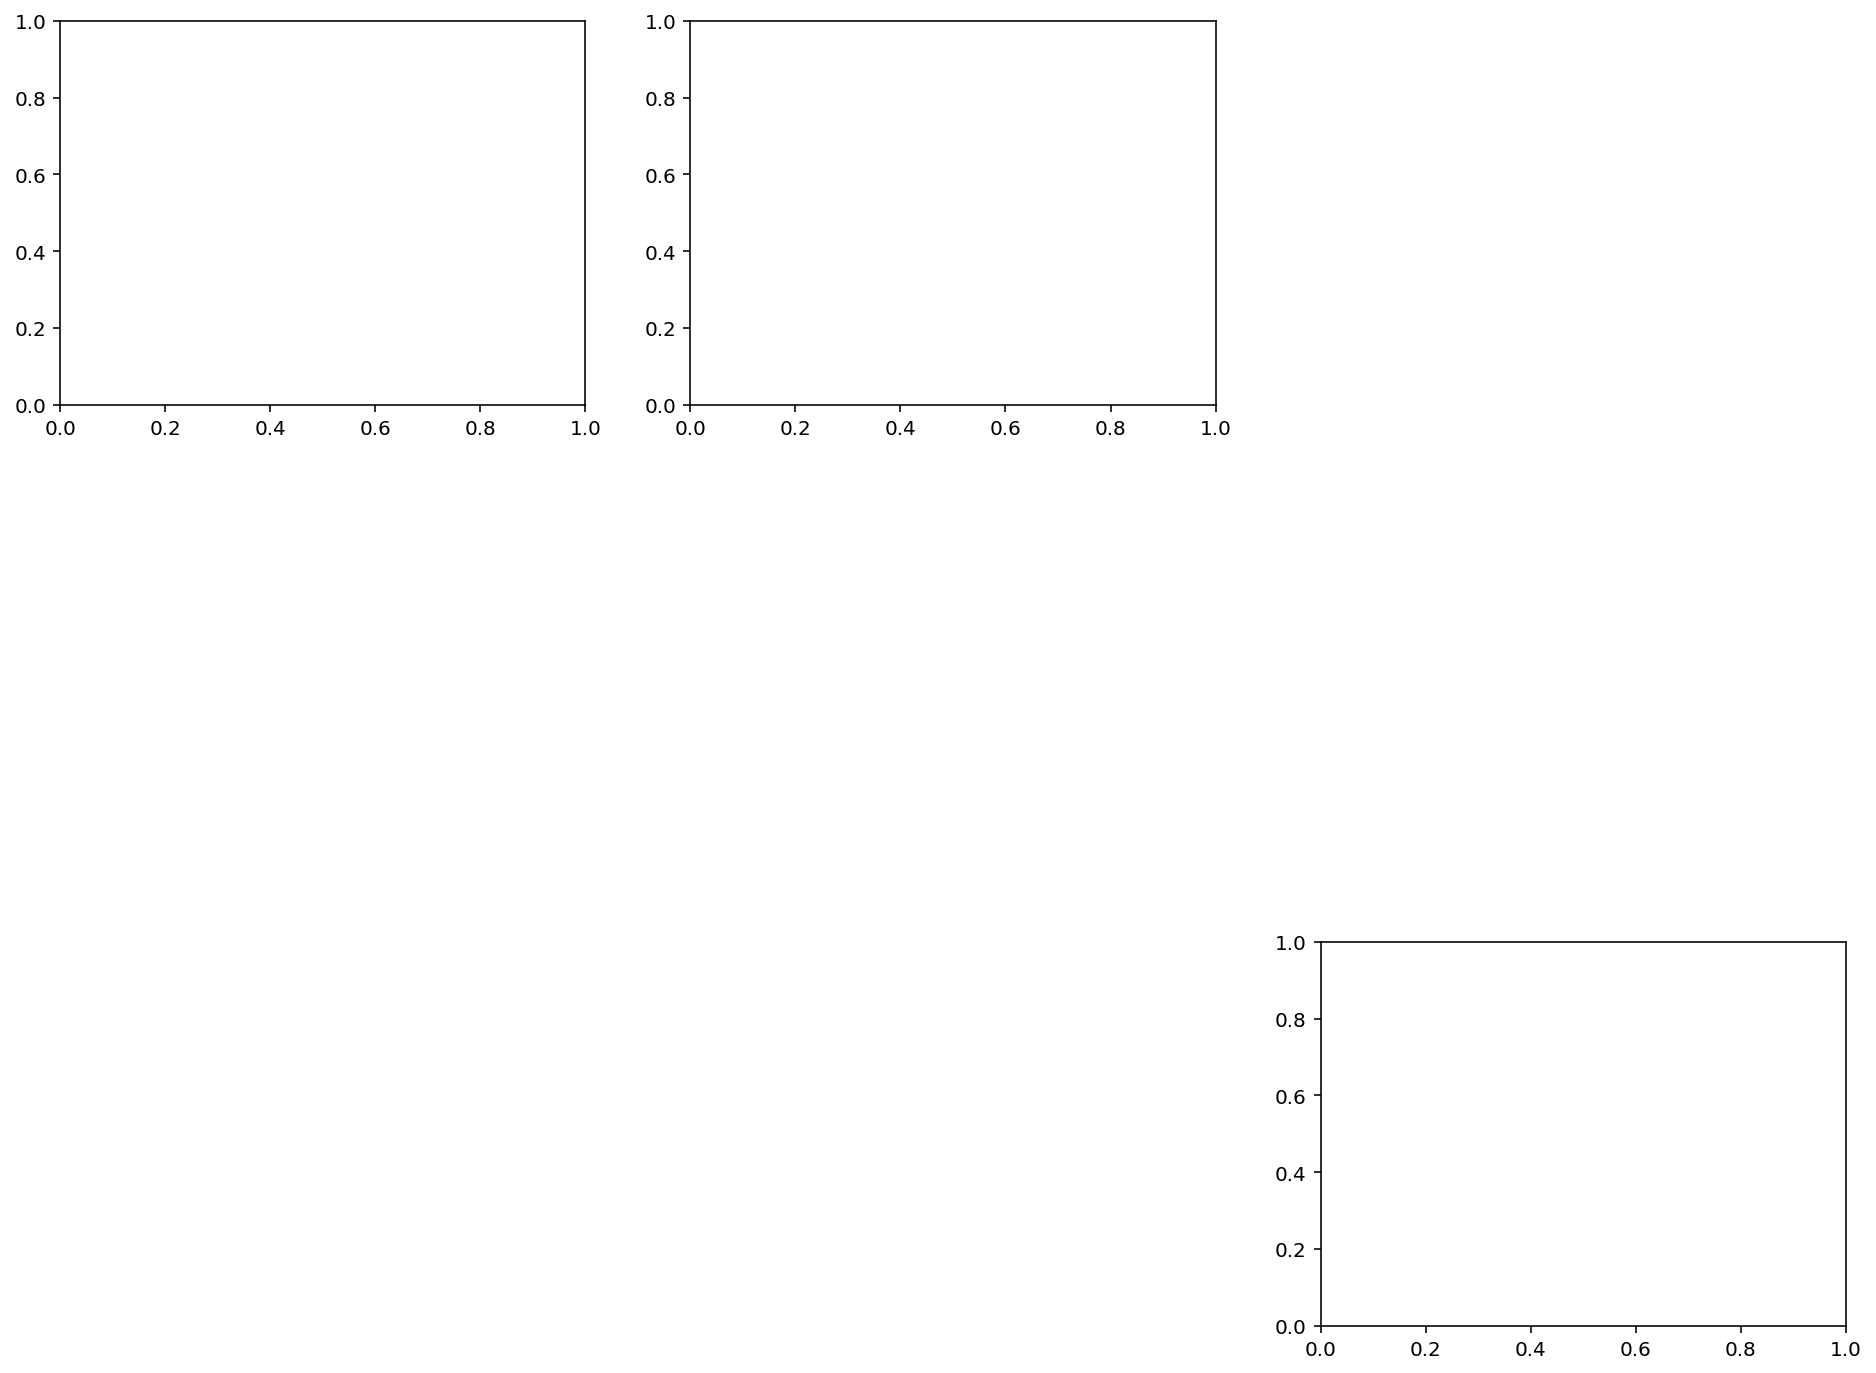

In [13]:
graph = plt.figure(figsize=(16,12))
graph.add_subplot(331)
graph.add_subplot(332)
graph.add_subplot(339)
plt.show()

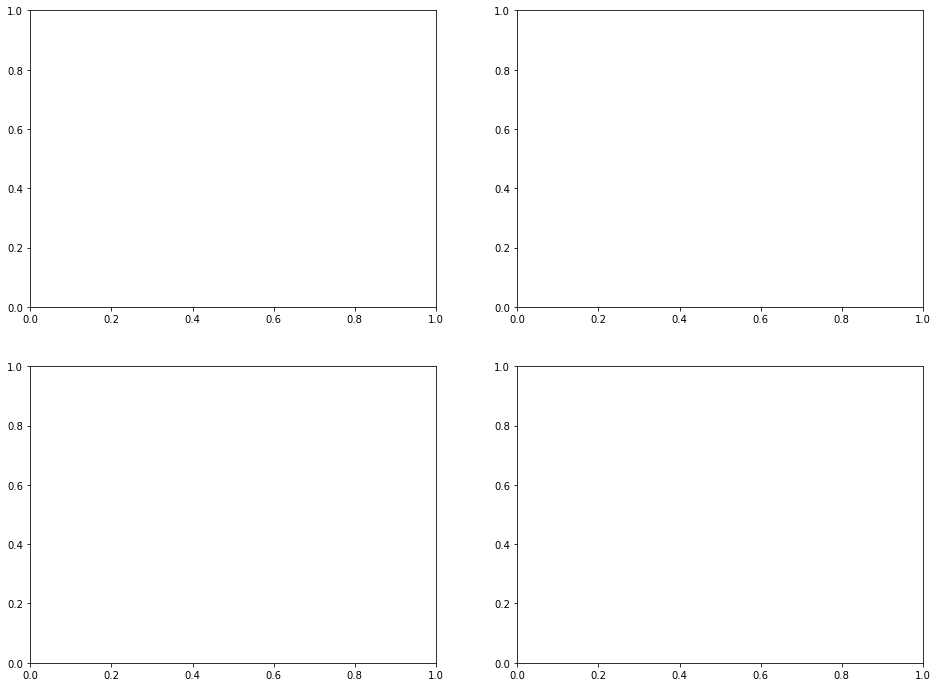

In [22]:
# fig = plt.figure()
fig = plt.figure(figsize=(16, 12))
fig.add_subplot(221)   #top left
fig.add_subplot(222)   #top right
fig.add_subplot(223)   #bottom left
fig.add_subplot(224)   #bottom right 
plt.show()

In [ ]:
### Plotting 

In [ ]:
macd_signal_line
signals

In [33]:
signals.columns

Index(['price', 'buy_sell'], dtype='object')

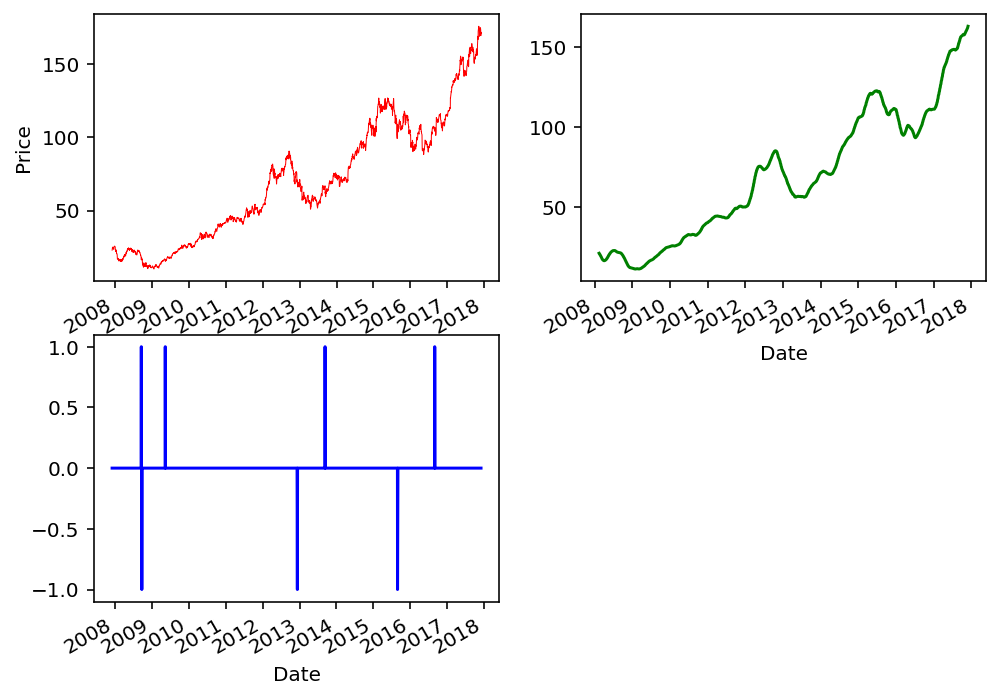

In [54]:
# putting all above together
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(221, ylabel='Price')
macd_signal_line['price'].plot(ax=ax1,color = 'r', lw = 0.5)
ax2 = fig.add_subplot(222)
macd_signal_line['SMA'].plot(ax=ax2, color = 'g')
ax3 = fig.add_subplot(223)
signals['buy_sell'].plot(ax=ax3, color = 'b')
plt.show()

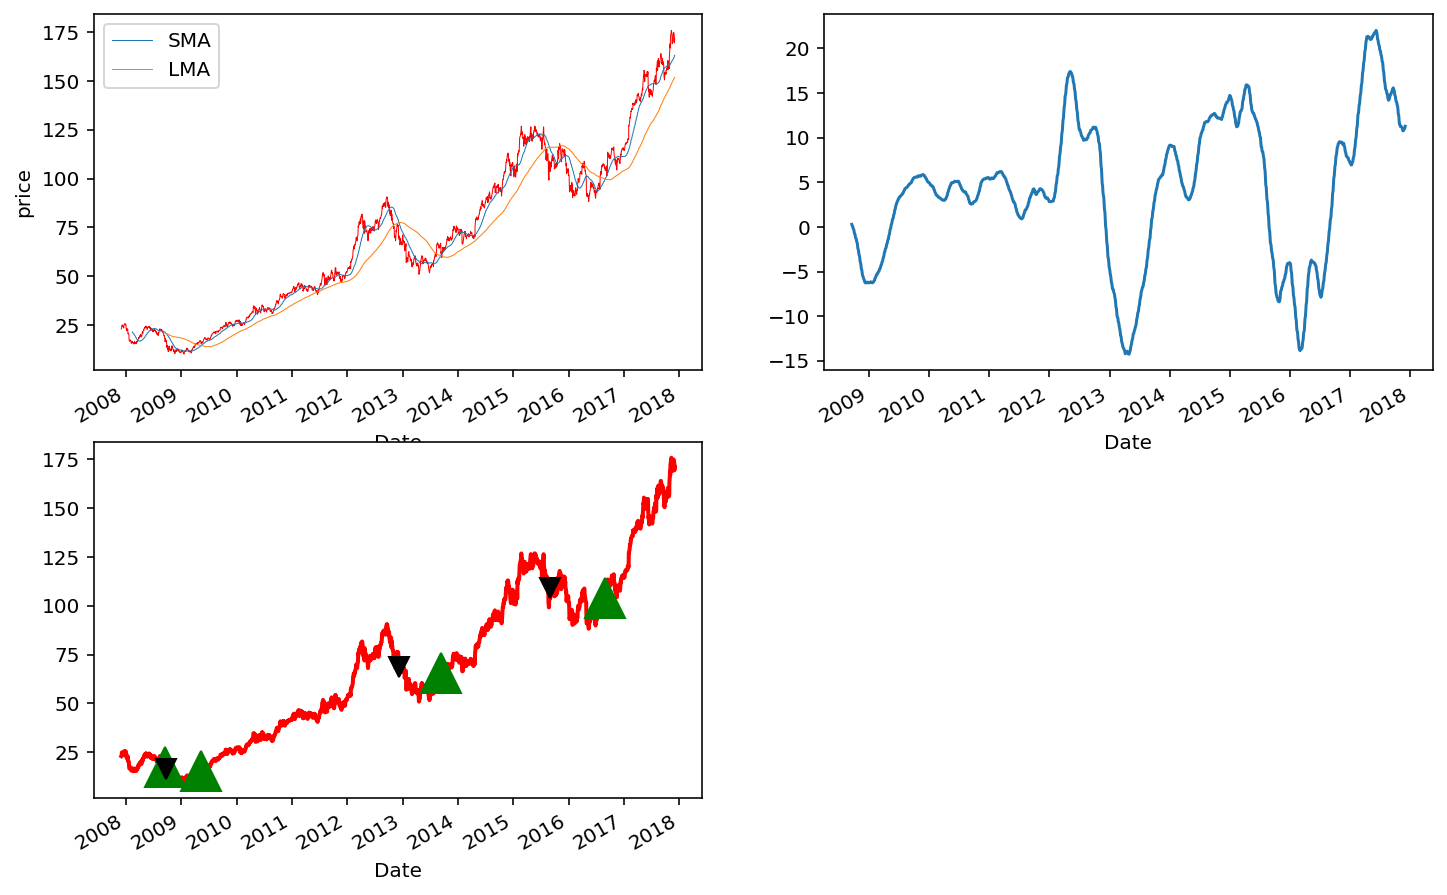

In [66]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221, ylabel='price')
macd_signal_line['price'].plot(ax=ax1, color = 'r', lw = 0.5)
macd_signal_line[['SMA', 'LMA']].plot(ax = ax1, lw=0.5)
ax2 = fig.add_subplot(222)
macd_signal_line['MACD'].plot(ax = ax2)
ax3 = fig.add_subplot(223)
macd_signal_line['price'].plot(ax=ax3, color = 'r', lw = 2.)
# macd_signal_line[['SMA', 'LMA']].plot(ax = ax1, lw=2.)
ax3.plot(macd_signal_line.loc[signals.buy_sell ==1.0].index, macd_signal_line.price[signals.buy_sell == 1.0], '^', markersize=20, color = 'g')
ax3.plot(macd_signal_line.loc[signals.buy_sell == -1.0].index, macd_signal_line.price[signals.buy_sell == -1.0], 'v', markersize=10, color='k')
plt.show()


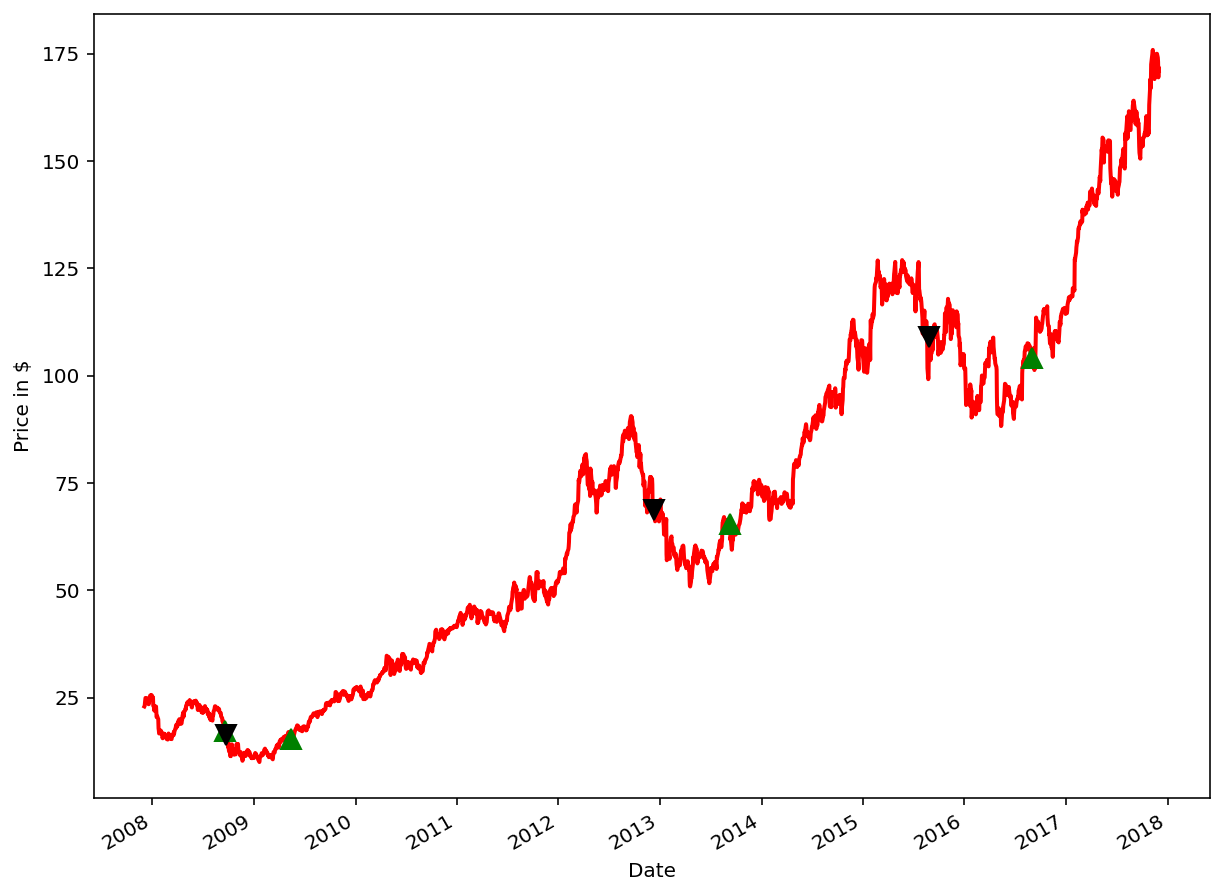

In [70]:
# putting all above together
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111, ylabel='Price in $')
macd_signal_line['price'].plot(ax=ax1, color = 'r', lw = 2.)
# macd_signal_line[['SMA', 'LMA']].plot(ax = ax1, lw=2.)
ax1.plot(macd_signal_line.loc[signals.buy_sell ==1.0].index, macd_signal_line.price[signals.buy_sell == 1.0] , '^', markersize=10, color = 'g')
ax1.plot(macd_signal_line.loc[signals.buy_sell == -1.0].index, macd_signal_line.price[signals.buy_sell == -1.0], 'v', markersize=10, color='k')
plt.show()

In [73]:
def plot_macd_buy_sell(macd_signal_line, signals, symbol):
    """
    Plot for macd price, shortma, longma, buy signal, sell signal
    Input: data frame with all above information
    Output: None
    """
    # putting all above together
    fig = plt.figure(figsize=(12,8))
    plt.title(symbol)
    #fig1
    ax1 = fig.add_subplot(411, ylabel='Price in $')
    macd_signal_line['price'].plot(ax=ax1, color = 'r', lw = 2.)
    macd_signal_line[['SMA', 'LMA']].plot(ax = ax1, lw=2.)
    #fig2
    ax2 = fig.add_subplot(412, ylabel = 'buy signal')
    signals['price'].plot(ax=ax2, color = 'r', lw = 2.)
    ax2.plot(signals.loc[signals.buy_sell == 1.0].index, signals.price[signals.buy_sell == 1.0], '^', markersize=10, color = 'm')
    #fig3
    ax3 = fig.add_subplot(413, ylabel = 'sell signal')
    signals['price'].plot(ax=ax3, color = 'r', lw = 2.)
    ax3.plot(signals.loc[signals.buy_sell == -1.0].index, signals.price[signals.buy_sell == -1.0], 'v', markersize=10, color='k')
    #fig4
    ax4 = fig.add_subplot(414, ylabel='buy sell signal')
    signals['price'].plot(ax=ax4, color = 'r', lw = 2.)
    # add buy sell
    ax4.plot(signals.loc[signals.buy_sell == 1.0].index, signals.price[signals.buy_sell == 1.0], '^', markersize=10, color = 'g')
    ax4.plot(signals.loc[signals.buy_sell == -1.0].index, signals.price[signals.buy_sell == -1.0], 'v', markersize=10, color='k')
    #
    plt.show()

In [72]:
help(plot_macd_buy_sell)

Help on function plot_macd_buy_sell in module __main__:

plot_macd_buy_sell(macd_signal_line, signals, symbol)
    Plot for macd price, shortma, longma, buy signal, sell signal
    Input: data frame with all above information
    Output: None



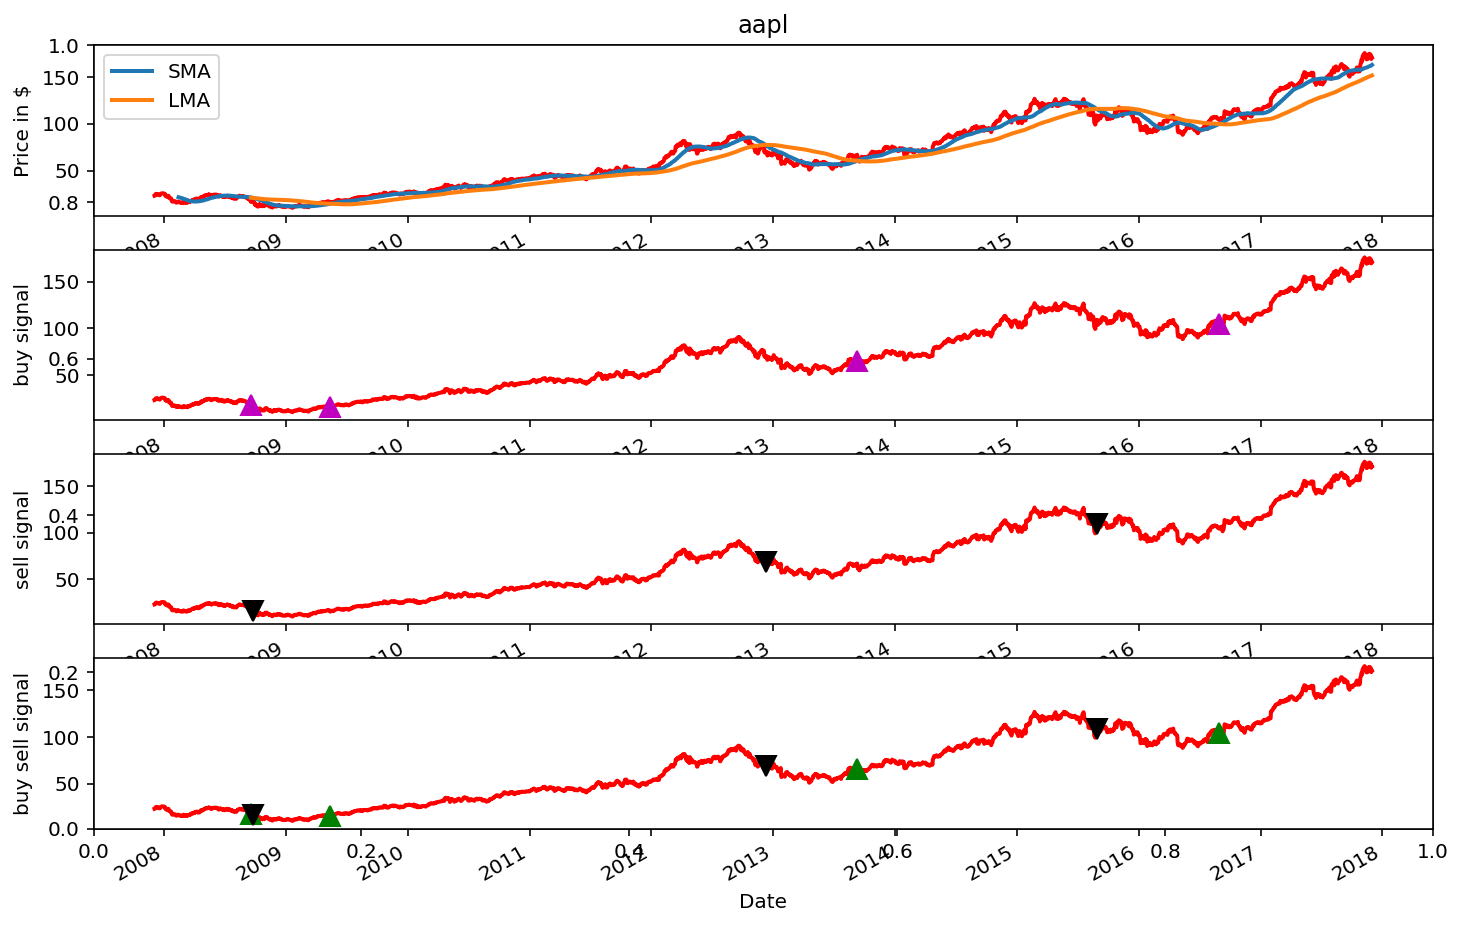

In [74]:
plot_macd_buy_sell(macd_signal_line, signals, 'aapl')

In [ ]:
macd : 1 000000 -1 00000 1 0000 -1 0000
    
    
RSI: 1 000  1 0000 1 0000 1 000 -1